In [1]:
# Hotel Booking EDA - Jupyter Notebook

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Step 2: Load Dataset
df = pd.read_csv('C:\\Users\\hp\\Downloads\\hotel_booking (1).csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [2]:
# Step 3: Basic Info & Null Values
df.info()
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

In [3]:
# Step 4: Data Cleaning (Optional - based on missing values)
# Drop rows with missing values for simplicity
df.dropna(inplace=True)


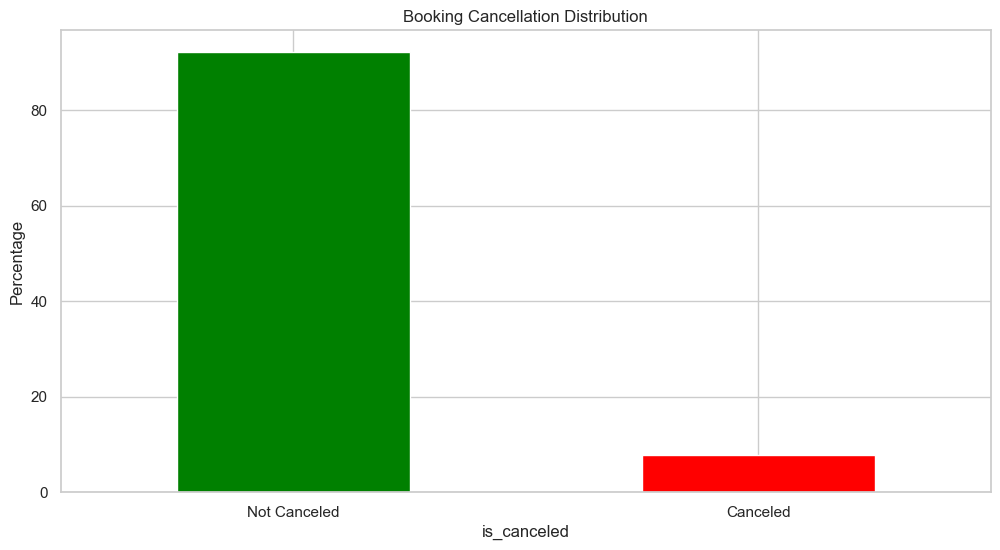

In [4]:
# Step 5: Cancellation Analysis
# Percentage of canceled vs. not canceled bookings
cancel_counts = df['is_canceled'].value_counts(normalize=True) * 100
cancel_counts.plot(kind='bar', color=['green', 'red'])
plt.xticks([0,1], ['Not Canceled', 'Canceled'], rotation=0)
plt.title("Booking Cancellation Distribution")
plt.ylabel("Percentage")
plt.show()


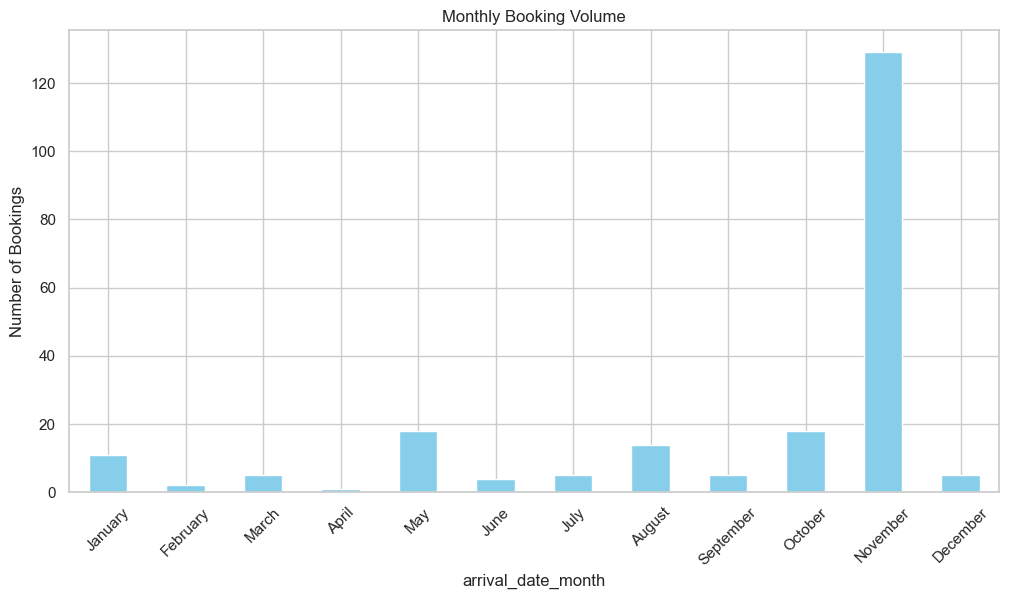

In [5]:
# Step 6: Seasonality - Monthly Booking Trends
monthly_bookings = df.groupby('arrival_date_month')['is_canceled'].count()
monthly_bookings = monthly_bookings.reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

monthly_bookings.plot(kind='bar', color='skyblue')
plt.title("Monthly Booking Volume")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


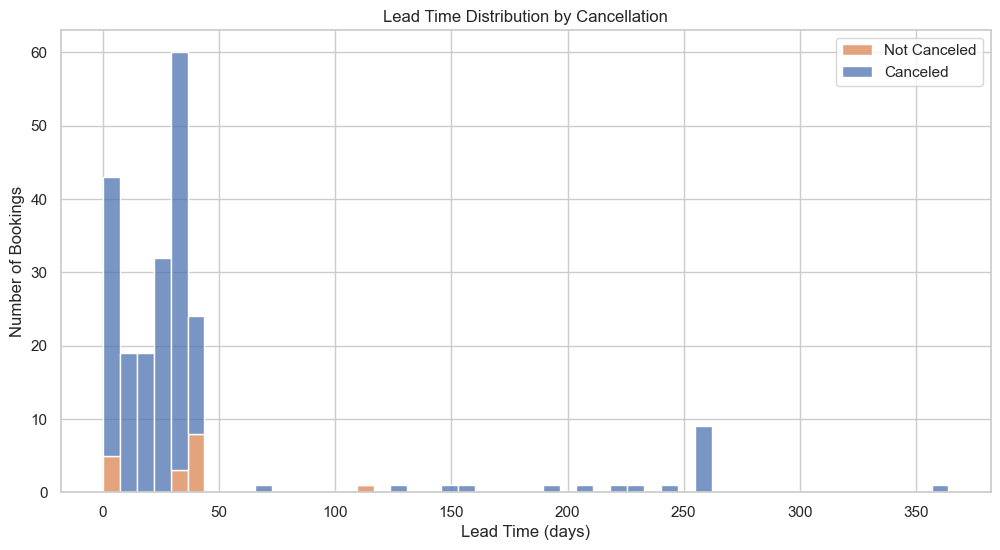

In [6]:
# Step 7: Lead Time Analysis
sns.histplot(data=df, x='lead_time', hue='is_canceled', multiple='stack', bins=50)
plt.title("Lead Time Distribution by Cancellation")
plt.xlabel("Lead Time (days)")
plt.ylabel("Number of Bookings")
plt.legend(['Not Canceled', 'Canceled'])
plt.show()


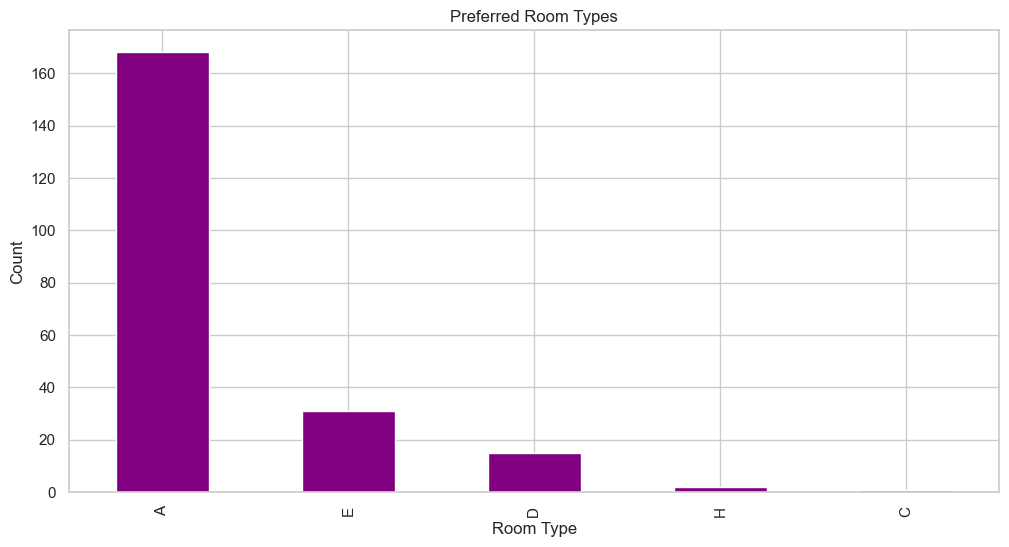

In [7]:
# Step 8: Customer Preferences - Room Type
room_pref = df['reserved_room_type'].value_counts()
room_pref.plot(kind='bar', color='purple')
plt.title("Preferred Room Types")
plt.ylabel("Count")
plt.xlabel("Room Type")
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


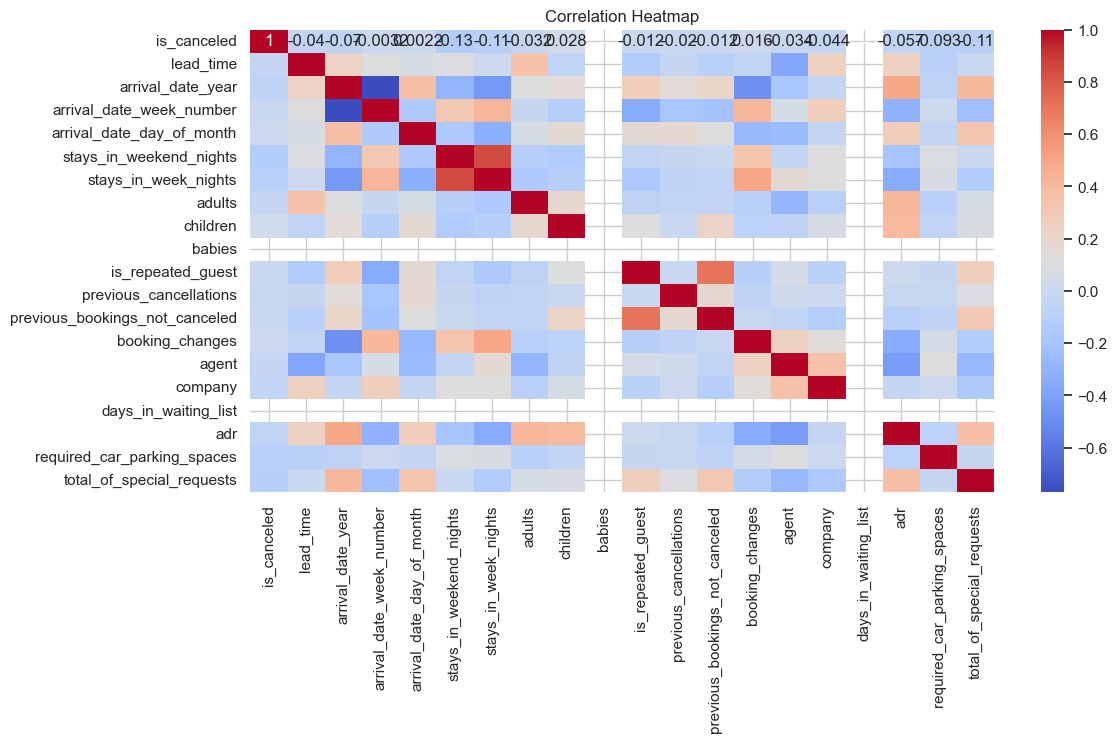

In [9]:
# Step 10: Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
